In [ ]:
from google.colab import drive
# 0. Drive bağlantısı
drive.mount('/content/drive')

In [6]:
import joblib
import shap
import numpy as np
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer

In [ ]:
labse = SentenceTransformer("sentence-transformers/LaBSE")
model = joblib.load("/content/drive/MyDrive/labse_xgboost_model.pkl")

In [7]:
def predict_and_explain(text):
    embedding = labse.encode([text])
    prediction = model.predict(embedding)[0]
    label = "positive" if prediction == 1 else "negative"
    print(f"Tahmin sonucu: {label}")

    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(embedding)
    shap.force_plot(
        explainer.expected_value,
        shap_values[0],
        features=embedding[0],
        matplotlib=True
    )

Tahmin sonucu: positive


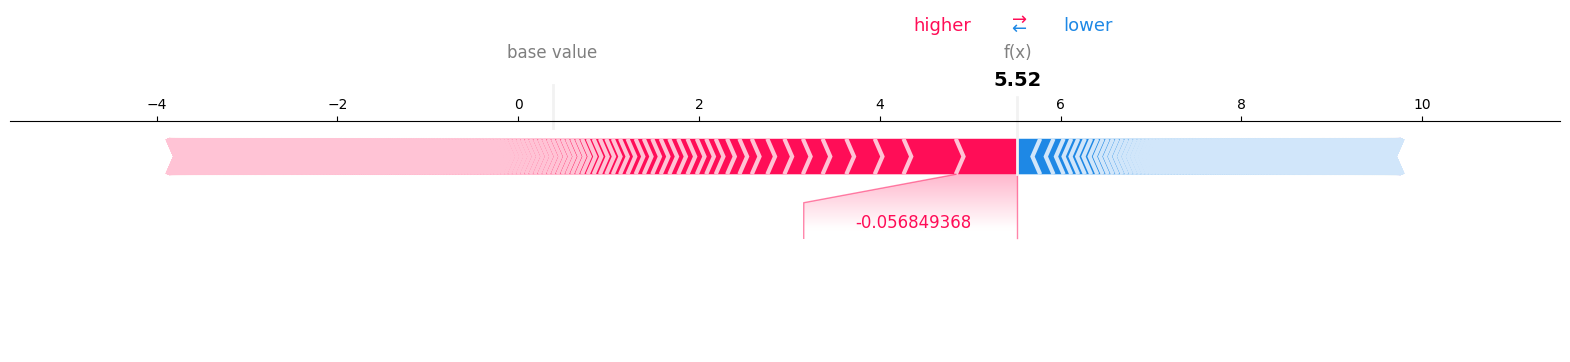

In [8]:
predict_and_explain("Bu tətbiq çox faydalıdır və istifadəsi rahatdır.")